# Gramener Case Study

The analysis process is divided into four steps:

    Step 1:- Data understanding
    Step 2:- Data cleaning 
    Step 3:- Data Analysis
    Step 4:- Recommendations

### Importing warning library to remove warnings 

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Importing required libraries to perform analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data set 

In [3]:
loan=pd.read_csv("loan.csv",low_memory=False)

## Step1:- Data Understanding

<B> Inspecting the data frame

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan.shape

(39717, 111)

In [6]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Some important columns are loan_amount,term,interest rate,grade,sub grade,anual income,purpose of the loan etc.

The Target Varibale, is loan staus.

In [7]:
loan.describe() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Step2 :- Data Cleaning

###### Checking the number of null values in each column

In [8]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


###### percentage of missing values in each column

In [9]:
round(loan.isnull().sum()/len(loan.index),2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


###### Droping columns having more than 90% missing values

In [10]:
missing=loan.columns[100*(loan.isnull().sum()/len(loan.index))>90]
loan=loan.drop(missing,axis=1)

In [11]:
#Check the shape to confirm that columns are droped
loan.shape

(39717, 55)

In [12]:
# Checking again to confirm all column with higer percentage missing value are droped
(loan.isnull().sum()/len(loan.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


Ther are two column with approx 32% and 64% missing values.

In [13]:
# Let's check those two columns
loan.loc[:,['desc','mths_since_last_deliq']].head()

,desc,mths_since_last_deliq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,NaN
4,Borrower added on 12/21/11 > I plan on combi...,NaN


Desc contains comments the applicant has writen it is not required for this analysis.
mths_sincs_last_deliq represents the number of months passed since the person last fell into 90 DPD group.So, it will be null for every new application.
Thus we can drop both the columns.

In [14]:
#droping both the columns
loan=loan.drop(['desc','mths_since_last_delinq'], axis=1)

In [15]:
# summarise number of missing values again
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

Let's check the rows for number of missing values

In [16]:
# missing values row vise
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [17]:
# checking if any row has more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

Since there is no row having more than 5 missing values we can continue for further process.

In [18]:
behaviour=  ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc",
                  "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int",
                  "total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt",
                  "last_credit_pull_d","application_type"]
loan=loan.drop(behaviour,axis=1)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

We will not be able to use the variables zip code, address, state etc.
The variable 'title' is derived from the variable 'purpose'
thus let get rid of all these variables as well

In [19]:
loan = loan.drop(['id','emp_title','emp_length','title', 'url', 'zip_code', 'addr_state'], axis=1)

In [20]:
# The column int_rate is character type, let's convert it to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

Now,let's have a look at the target variable - loan_status. 

In [21]:
loan['loan_status'] = loan['loan_status'].astype('category')
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [22]:
# filtering only fully paid or charged-off
loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

## Step 3:- Data Analysis

Let's start with <B> Univeriate Analysis 

In [23]:
#Overall default rates
round(np.mean(loan['loan_status']),2)

0.15

Let's visualise the average default rates across categorical variables.

In [24]:
# Defining a function to plot loan_status across categorical variables
def categoricalplot(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=loan)
    plt.show()

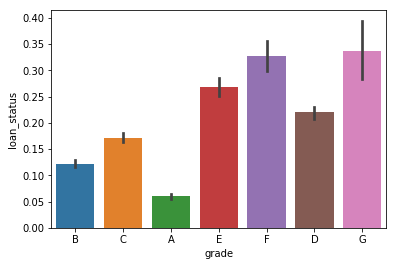

In [25]:
# Plotting default rates across grade of the loan
categoricalplot('grade')

It is clearly as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by bank based on the riskiness of the loan. 

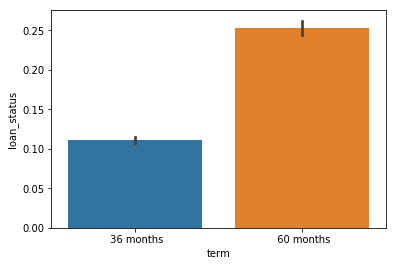

In [26]:
# Plotting default rates across term of the loan
categoricalplot('term')

There is more defaulter rate in 60 months term.

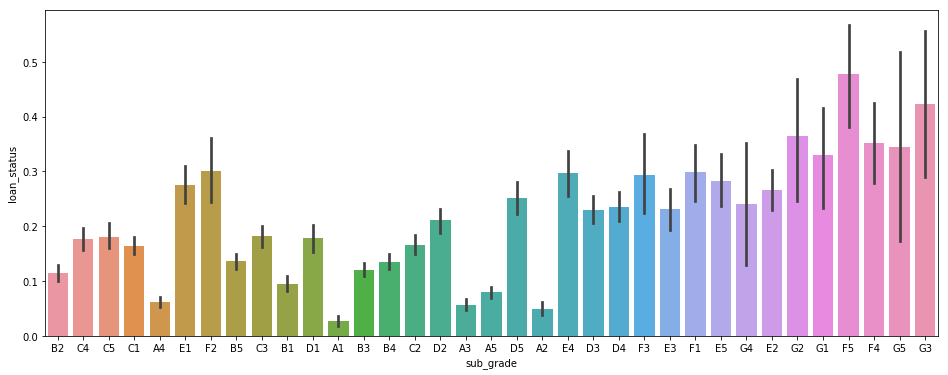

In [27]:
# Plotting default rates across sub grade of the loan
plt.figure(figsize=(16,6))
categoricalplot('sub_grade')

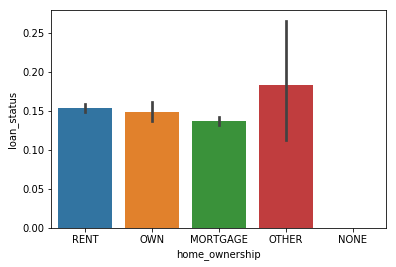

In [28]:
# Plotting default rates across home ownership
categoricalplot('home_ownership')

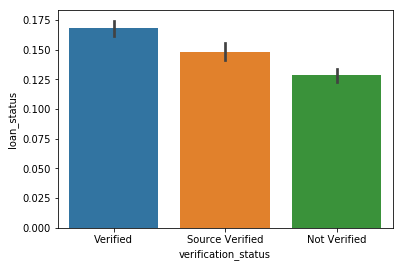

In [29]:
# Plotting default rates across verification status
categoricalplot('verification_status')

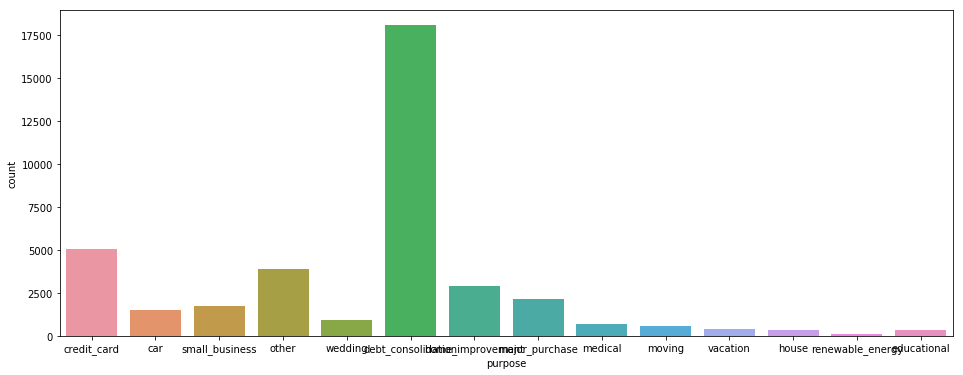

In [30]:
# Plotting default rates across the purpose of the loan
plt.figure(figsize=(16, 6))
sns.countplot(loan['purpose'])

In [31]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)
# let's first observe the number of loans granted across years
loan.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

In [32]:
# number of loans across months
loan.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

Most loans are granted in December, and in general in the latter half of the year.

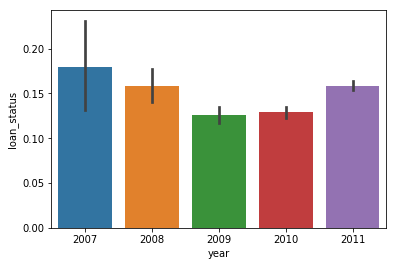

In [33]:
# lets compare the default rates across years
categoricalplot('year')

the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010

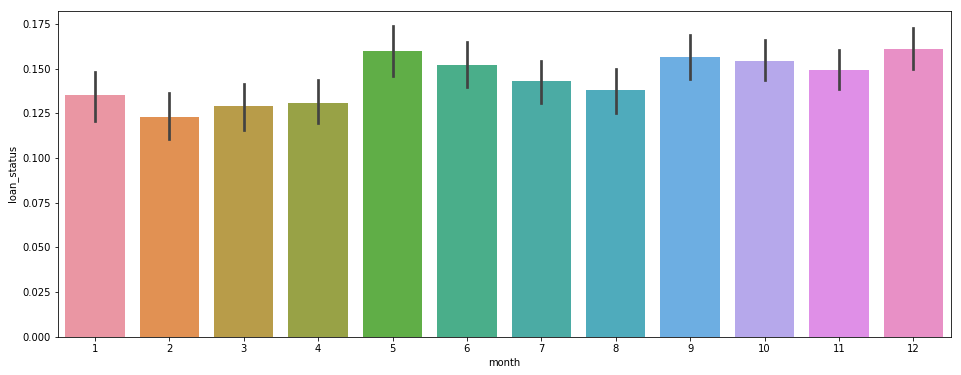

In [34]:
# comparing default rates across months
plt.figure(figsize=(16, 6))
categoricalplot('month')

not much variation across months

Let's now analyse how the default rate varies across continuous variables.

C:\Users\DELL\Anaconda3.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


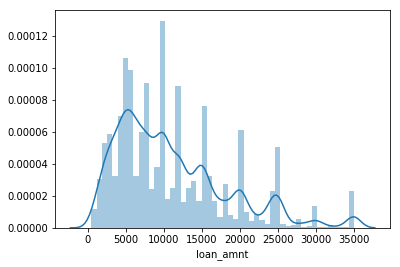

In [35]:
# loan amount
sns.distplot(loan['loan_amnt'])
plt.show()

 the median loan amount is around 10,000

Let's bin the loan amount variable into small, medium, high, very high.

In [36]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))

In [37]:
loan['loan_amnt'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

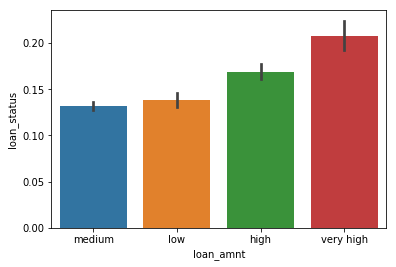

In [38]:
# let's compare the default rates across loan amount type
categoricalplot('loan_amnt')

higher the loan amount, higher the default rate

In [39]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate(x))

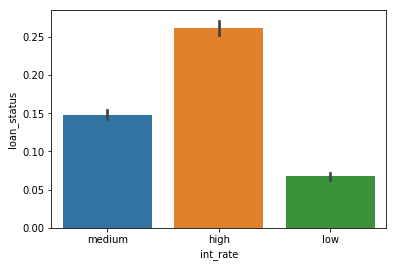

In [40]:
# comparing default rates across rates of interest
categoricalplot('int_rate')

high interest rates default more, as expected

In [41]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
loan['dti'] = loan['dti'].apply(lambda x: dti(x))

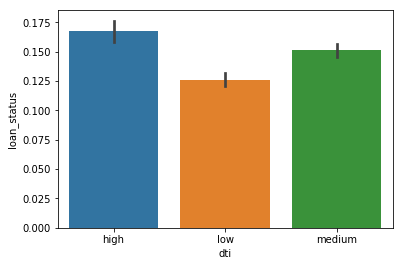

In [42]:
# comparing default rates across debt to income ratio
categoricalplot('dti')

high debt to income ratio translates into higher default rates, as expected

In [43]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment'] = loan['installment'].apply(lambda x: installment(x))

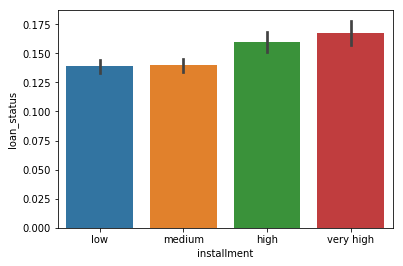

In [44]:
# comparing default rates across installment
categoricalplot('installment')

higher installment amount leads to higher default rate

In [45]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'
    
loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

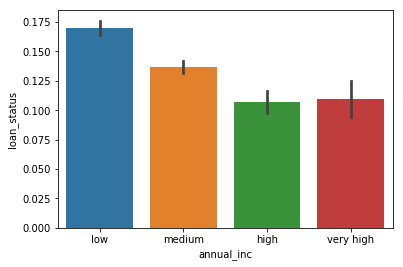

In [46]:
# annual income and default rate
categoricalplot('annual_inc')

lower the annual income, higher the default rate

#### Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.


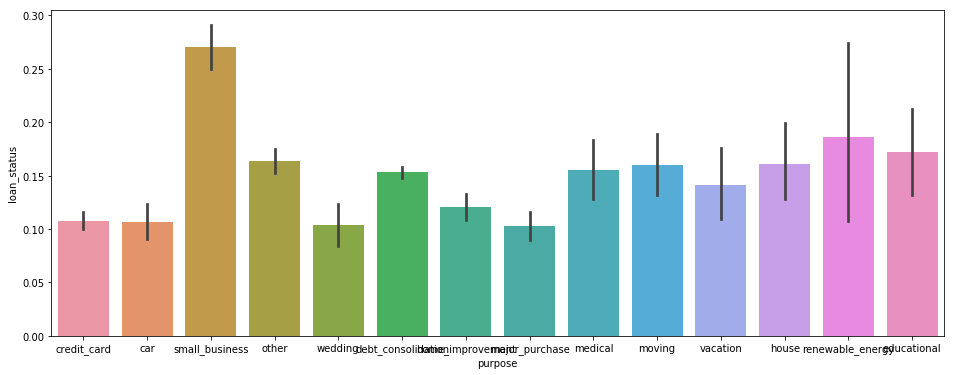

In [47]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
categoricalplot('purpose')

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

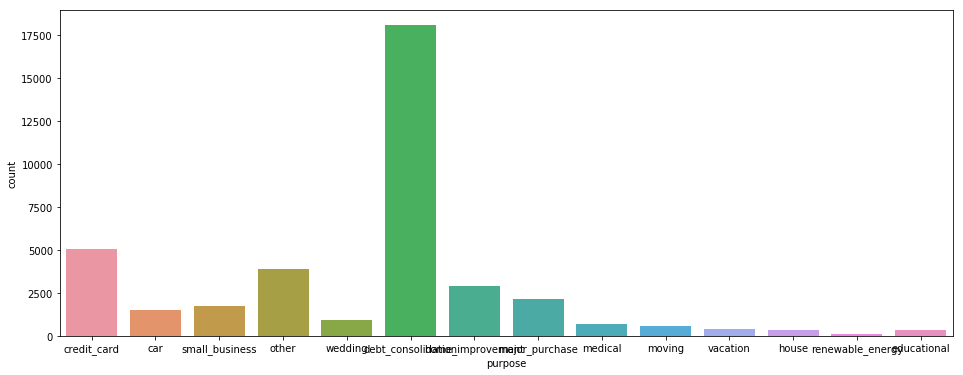

In [48]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=loan)
plt.show()

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [49]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan = loan[loan['purpose'].isin(main_purposes)]
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

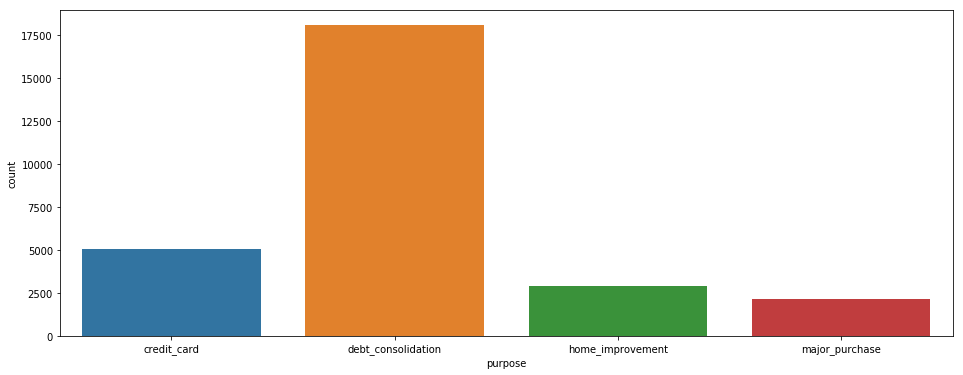

In [50]:
# plotting number of loans by purpose 
plt.figure(figsize=(16, 6))
sns.countplot(x=loan['purpose'])
plt.show()

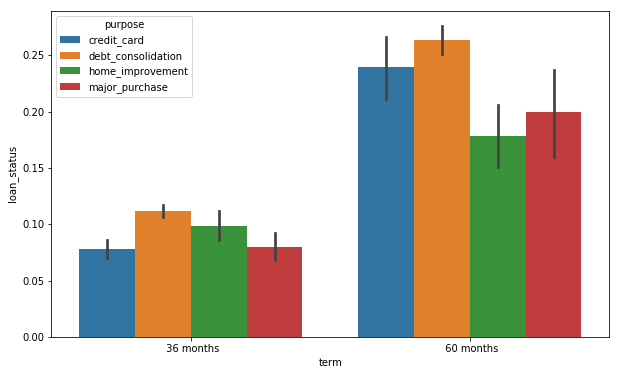

In [51]:
# lets write a function which takes a categorical variable and plots the default rate segmented by purpose 
def segmentedplot(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=loan)
    plt.show()
segmentedplot('term')

In general, debt consolidation loans have the highest default rates.

## Step 4 Recomendations

The reccomendation after the analysis are:

    1)There is more defaulter rate in 60 months term of loan as compared to 36 month term of loan.
    2)the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010.
    3)high interest rates leads to more defaulters.
    4)high debt to income ratio translates into higher default rates.
    5)higher installment amount leads to higher default rates.
    6)lower the annual income, higher the default rate
    7)In general, debt consolidation loans have the highest default rates.